<a href="https://colab.research.google.com/github/NIlesh-Thamke/Machine-Learning-Practicals/blob/main/Practical_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor # Importing KNeighborsRegressor

In [17]:
data = pd.read_csv('/content/data.csv')
print(data.head())

            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  5/2/2014 0:00   313000.0         3       1.50         1340      7912   
1  5/2/2014 0:00  2384000.0         5       2.50         3650      9050   
2  5/2/2014 0:00   342000.0         3       2.00         1930     11947   
3  5/2/2014 0:00   420000.0         3       2.25         2000      8030   
4  5/2/2014 0:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0

In [18]:
print(data.isnull())

       date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     False  False     False      False        False     False   False   
1     False  False     False      False        False     False   False   
2     False  False     False      False        False     False   False   
3     False  False     False      False        False     False   False   
4     False  False     False      False        False     False   False   
...     ...    ...       ...        ...          ...       ...     ...   
4595  False  False     False      False        False     False   False   
4596  False  False     False      False        False     False   False   
4597  False  False     False      False        False     False   False   
4598  False  False     False      False        False     False   False   
4599  False  False     False      False        False     False   False   

      waterfront   view  condition  sqft_above  sqft_basement  yr_built  \
0          False  False      False  

In [19]:
print(data.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [20]:
X = data[['sqft_living','floors','bedrooms']]  # Features (independent variables)
y = data["price"]

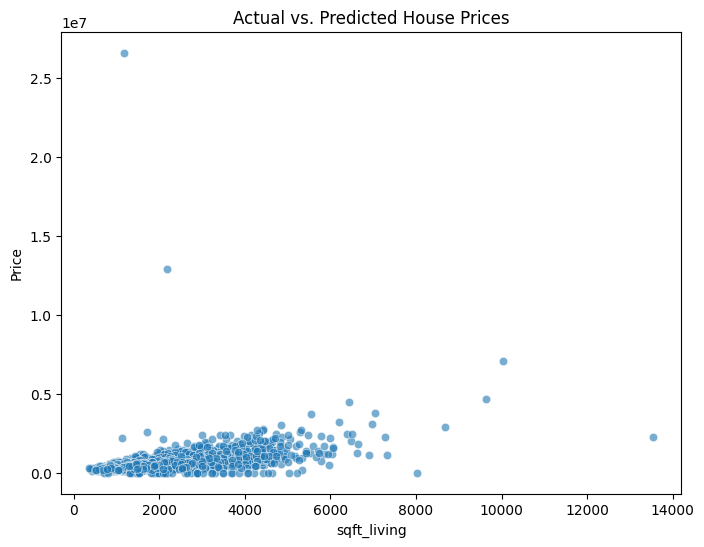

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['sqft_living'], y=data['price'], alpha=0.6)  # Access columns using data['column_name']
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

print("\nModel Performance Metrics:")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
r2_score = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2_score:.2f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 223741.31
Mean Squared Error (MSE): 991266809259.05
Root Mean Squared Error (RMSE): 995623.83
R-squared (R2) Score: 0.03


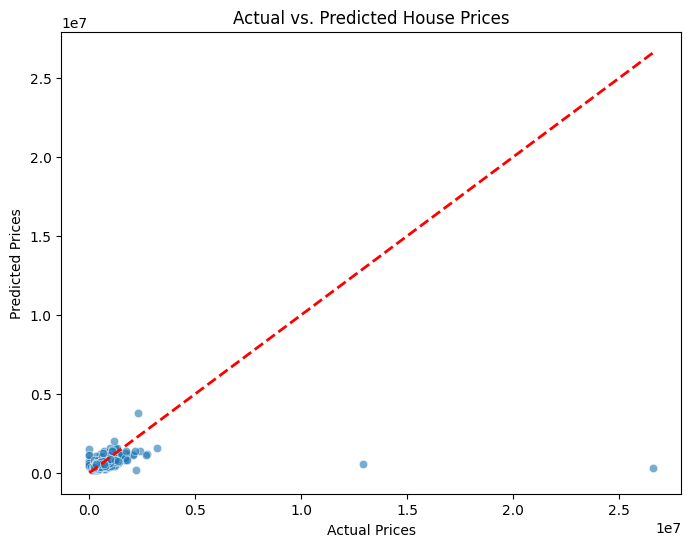

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

Bonus Assignment

In [27]:
k_values = [3, 5, 7, 10, 15]  # Different values of k to experiment
results = []

In [35]:
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_knn = knn_model.predict(X_test_scaled)

    mae_knn = mean_absolute_error(y_test, y_pred_knn)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    rmse_knn = np.sqrt(mse_knn)

    results.append([k, mae_knn, mse_knn, rmse_knn])

In [38]:
results_df = pd.DataFrame(results, columns=["k", "MAE", "MSE", "RMSE"])

# Rest of the code remains the same
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred_lr = linear_model.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)


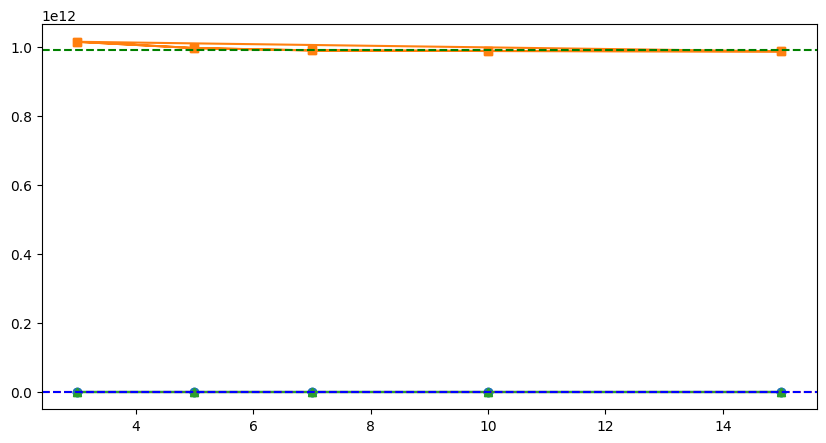

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(results_df["k"], results_df["MAE"], marker='o', label="MAE")
plt.plot(results_df["k"], results_df["MSE"], marker='s', label="MSE")
plt.plot(results_df["k"], results_df["RMSE"], marker='^', label="RMSE")
plt.axhline(y=mae_lr, color='r', linestyle='--', label="Linear Regression MAE")
plt.axhline(y=mse_lr, color='g', linestyle='--', label="Linear Regression MSE")
plt.axhline(y=rmse_lr, color='b', linestyle='--', label="Linear Regression RMSE")


<ipython-input-40-995dc2cb364b>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


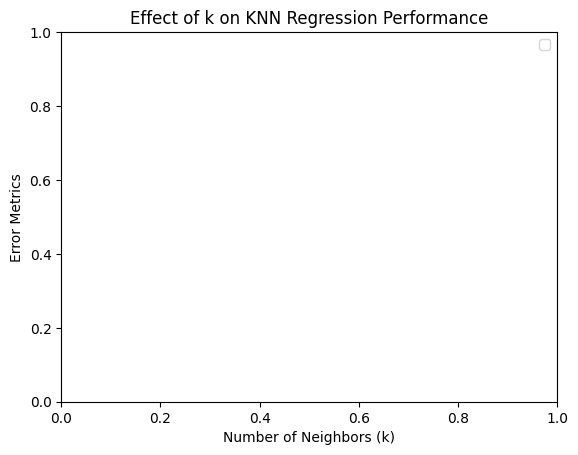

In [40]:
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Metrics")
plt.title("Effect of k on KNN Regression Performance")
plt.legend()
plt.show()